# Case Tractian

## Parte 1 - Data ETL, Data Wrangling e Data Exploration

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
raw_data1_path = '../raw_data/part1/'
raw_data2_path = '../raw_data/part2/'
output_data_path = '../output_data/'
image_path = '../image/'

### 1.1. Extração dos dados

- Em cada arquivo existe uma coleta de vibração realizada pelo sensor “band-aid”.
- O nome do arquivo traz as seguintes informações: “{start}-{interval}-{sensor_id}.bin”
    - Exemplo: 1623535615-3006-IAJ9206.csv
        - start: 1623535615 [epoch Unix]
        - interval - sampling duration: 3006 [ms]
        - sensor_id: IAJ9206 [string que identifica um sensor]
- As coletas dizem respeito aos dados de aceleração em g nos eixos X, Y, Z de um acelerômetro.

**Acelerômetro:** Mede a aceleração exercida *sobre* objetos ([fonte](https://www.usinainfo.com.br/blog/acelerometro-e-giroscopio-arduino-na-obtencao-de-valores-x-y-e-z/)).

- Para cada um dos eixos (X, Y e Z) há uma aceleração g


In [3]:
IAJ9206 = pd.read_csv(raw_data1_path + '1623535615-3006-IAJ9206.csv') # start: 1623535615 - interval: 3006 - sensor_id: IAJ9206
NAH4736 = pd.read_csv(raw_data1_path + '1624962426-3006-NAH4736.csv') # start: 1624962426 - interval: 3006 - sensor_id: NAH4736
MYS2071 = pd.read_csv(raw_data1_path + '1624374799-3006-MYS2071.csv') # start: 1624374799 - interval: 3006 - sensor_id: MYS2071
NAI1549 = pd.read_csv(raw_data1_path + '1624040490-2957-NAI1549.csv') # start: 1624040490 - interval: 2957 - sensor_id: NAI1549

In [4]:
# Exemplo de dados

IAJ9206.head()

,x,y,z
0,-1.003174,-0.097778,-0.017334
1,-0.993591,-0.084778,-0.009766
2,-0.964844,-0.048462,0.062012
3,-0.868591,-0.010437,0.103577
4,-0.885498,-0.041992,0.078003


### 1.2. Dados contidos no domínio do tempo

Text(0.5, 1.0, 'NAI1549')

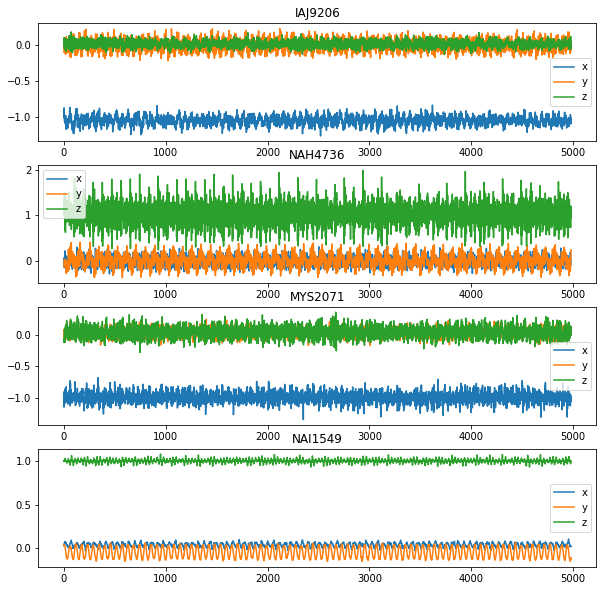

In [5]:
fig, ax = plt.subplots(4, 1, figsize = (10, 10))
_ = IAJ9206.plot(kind = 'line', ax = ax[0])
ax[0].set_title('IAJ9206')
_ = NAH4736.plot(kind = 'line', ax = ax[1])
ax[1].set_title('NAH4736')
_ = MYS2071.plot(kind = 'line', ax = ax[2])
ax[2].set_title('MYS2071')
_ = NAI1549.plot(kind = 'line', ax = ax[3])
ax[3].set_title('NAI1549')

### 1.3. Dados contidos no domínio da frequência (fft) - WIP

**FFT:** Método de medição de áudio e acústica, converte um sinal em componentes espectrais individuais e fornece informações de frequência sobre o sinal.

Ver:

- https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
- https://coderedirect.com/questions/353802/how-to-extract-features-from-fft
- https://www.researchgate.net/post/Calculating_PSD_using_a_3_axis_accelerometer
- https://www.if.ufrj.br/~pef/producao_academica/dissertacoes/2013_Leonardo_Vieira/experimentos_acelerometro.pdf
- https://www.usinainfo.com.br/blog/acelerometro-e-giroscopio-arduino-na-obtencao-de-valores-x-y-e-z/

# 2. Machine Learning, Deep learning e Data Driven Solutions

- collects.csv: Contém uma lista de objetos que representam as coletas obtidas para diferentes ativos.
- assets.csv: Contém as informações sobre os ativos aos quais as coletas fornecidas pertencem.

Assets = Ativos = Sensores

Collects = Coletas

### 2.1. Apresentar visualmente os dados contidos em cada arquivo, juntamente com as informações do ativo a que pertencem.

#### 2.1.1. Assets

In [6]:
#---- Dados

assets = pd.read_csv(raw_data2_path + 'assets.csv')

assets.head()

,_id,company,createdAt,description,model,modelType,name,sensors,specifications.axisX,specifications.axisY,specifications.axisZ,specifications.maxDowntime,specifications.maxTemp,specifications.power,specifications.rpm,specifications.workdays
0,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,"[""IAJ9206""]",vertical,horizontal,axial,48.00,NaN,3.7,1735.0,NaN
1,5fd0e297bf7d581c1823b8e4,5fbbadeb82a6b901c26df618,2020-12-09T14:43:35.168Z,NaN,5fd0cf96bf7d581c1823b4c4,heaterFurnace,RDF-61.1,"[""LZY4270""]",axial,vertical,horizontal,0.25,55.0,0.0,1740.0,NaN
2,5fb286de1369a4325dc45433,5f6b83e34dd69d4bc799ea1f,2020-11-16T14:04:14.564Z,-,5fb275981369a4325dc4542e,transformer,TRANSFORMADOR 500 KVA N°1,"[""MUR8453""]",horizontal,vertical,NaN,NaN,65.0,NaN,NaN,NaN
3,6023fad9ed8ef30e9d30952b,5fb2c4eb1369a4325dc4545f,2021-02-10T15:25:13.265Z,NaN,6023f7dced8ef30e9d30945f,pump,Motor Bomba - Tanque de Expansão Tubo Verde,"[""MXK6435""]",horizontal,axial,vertical,48.00,NaN,7.0,3525.0,NaN
4,5ff71a150b6abb7be05083b0,5f17203f640a00cc08cb1b3d,2021-01-07T14:26:29.726Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.12- Motor,"[""MYD8706""]",horizontal,axial,vertical,NaN,NaN,30.0,1765.0,NaN


**Antes** de apresentar os dados visualmente, vamos a alguns detalhes:

Os dados de **assets** se referem a informação de sensores/ativos que estão distribuídos em várias indústrias. Esses sensores/ativos possuem uma determinada data de criação para cada indústria. 

O sensor está acoplado em uma máquina que, nos nossos dados, se chamam `modelType` e possui um determinado nome no campo `sensors`.


# Continuar aqui

In [7]:
assets.shape

(10, 16)

In [8]:
#---- Univariada: Quantas companhias temos presentes com ativos?

assets['company'].unique()

array(['5fb2c4eb1369a4325dc4545f', '5fbbadeb82a6b901c26df618',
       '5f6b83e34dd69d4bc799ea1f', '5f17203f640a00cc08cb1b3d',
       '5f8e02389950c66265569378'], dtype=object)

In [9]:
#---- Univariada: Quantos e quais tipos de máquinas temos sensores?

assets['modelType'].unique()

array(['compressor', 'heaterFurnace', 'transformer', 'pump',
       'eletricMotor', 'other'], dtype=object)

In [10]:
#---- Univariada: Quantos e quais tipos de máquinas temos sensores?

assets['modelType'].unique()

array(['compressor', 'heaterFurnace', 'transformer', 'pump',
       'eletricMotor', 'other'], dtype=object)

#### 2.1.2. Collects

In [11]:
collects = pd.read_csv(raw_data2_path + 'collects.csv')

collects.head()

,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp
0,60b57955f77013684c413e39,2021-06-01T00:03:33.370Z,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,IAJ9206,23.94
1,60b57c53f77013684c41409f,2021-06-01T00:16:19.173Z,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,IAJ9206,23.19
2,60b57f34f77013684c4142cd,2021-06-01T00:28:36.553Z,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,IAJ9206,22.50
3,60b58237f77013684c41450c,2021-06-01T00:41:27.622Z,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,IAJ9206,22.87
4,60b58515f77013684c414765,2021-06-01T00:53:41.450Z,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,IAJ9206,22.56


In [12]:
collects.shape

(33901, 13)

In [13]:
collects['sensorId'].unique()

array(['IAJ9206', 'LZY4270', 'MUR8453', 'MXK6435', 'MYD8706', 'MYS2071',
       'MZU6388', 'NAH4736', 'NAI1549', 'NEW4797'], dtype=object)

### 2.2. Desenvolver um modelo/função capaz de calcular o tempo de downtime e uptime para um ativo qualquer

### 2.3. Desenvolver um modelo/função capaz de identificar mudanças nos padrões de vibração para um ativo qualquer

### 2.4. Identificar possíveis falhas nos ativos utilizando o modelo desenvolvido no item 3 ou um novo modelo (a identificação deve ser autônoma e não uma análise visual)